In computer programming, pandas is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series.

In [9]:
import pandas as pd
import numpy as np

# Data types

## [Series](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html#pandas.Series) 
Series is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). The axis labels are collectively referred to as the index. The basic method to create a Series is to call:

In [6]:
pd.Series(list("abcdefg"))

0    a
1    b
2    c
3    d
4    e
5    f
6    g
dtype: object

In [15]:
labels = ['a', 'b', 'c']
my_list = ["el_one", "el_two", "el_three"]
d = {'a': 10, 'b': 20, 'c': 30}

In [16]:
pd.Series(d)

a    10
b    20
c    30
dtype: int64

In [17]:
pd.Series(data=my_list, index=labels)

a      el_one
b      el_two
c    el_three
dtype: object

In [19]:
pd.Series(my_list, labels)

a      el_one
b      el_two
c    el_three
dtype: object

In [20]:
pd.Series([sum, print, len])

0      <built-in function sum>
1    <built-in function print>
2      <built-in function len>
dtype: object

### Why Series are extremely usful? 

The are vectors!

In [39]:
import random
random.seed(42)

In [40]:
s1 = pd.Series(random.choices(range(5), k=10))
s2 = pd.Series(random.choices(range(3, 8), k=10))

In [41]:
s1, s2

(0    3
 1    0
 2    1
 3    1
 4    3
 5    3
 6    4
 7    0
 8    2
 9    0
 dtype: int64, 0    4
 1    5
 2    3
 3    3
 4    6
 5    5
 6    4
 7    5
 8    7
 9    3
 dtype: int64)

In [42]:
s1 + s2

0    7
1    5
2    4
3    4
4    9
5    8
6    8
7    5
8    9
9    3
dtype: int64

In [43]:
s1 * s2

0    12
1     0
2     3
3     3
4    18
5    15
6    16
7     0
8    14
9     0
dtype: int64

In [44]:
s1 / s2

0    0.750000
1    0.000000
2    0.333333
3    0.333333
4    0.500000
5    0.600000
6    1.000000
7    0.000000
8    0.285714
9    0.000000
dtype: float64

Series have a set of very usful properties

In [45]:
s1.shape

(10,)

In [46]:
s1.dtype

dtype('int64')

... and methods

In [47]:
s1.sum()

17

In [48]:
s1.std()

1.4944341180973264

In [49]:
s1.value_counts()

3    3
0    3
1    2
4    1
2    1
dtype: int64

In [51]:
s1.sort_values(inplace=True)

In [57]:
s1[1:8:2]

7    0
2    1
8    2
4    3
Name: some name, dtype: int64

In [53]:
s1.name = "some name"

In [54]:
s1

1    0
7    0
9    0
2    1
3    1
8    2
0    3
4    3
5    3
6    4
Name: some name, dtype: int64

## Data Frame
DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or a dict of Series objects. It is generally the most commonly used pandas object.

In [62]:
pd.DataFrame({"col1": s1, "col2": s2})

,col1,col2
0,3,4
1,0,5
2,1,3
3,1,3
4,3,6
5,3,5
6,4,4
7,0,5
8,2,7
9,0,3


In [60]:
pd.DataFrame(np.random.randn(5,4), index='A B C D E'.split(), columns='W X Y Z'.split())

,W,X,Y,Z
A,-0.011361,0.124558,3.614789,-1.346361
B,0.985504,-0.057538,3.073619,-0.005127
C,0.272285,-0.088303,-0.273337,0.332208
D,-2.543763,-0.951620,-1.593332,0.763041
E,-0.450502,1.173821,-0.921655,-0.377632


Pandas has [several I/O functions](http://pandas.pydata.org/pandas-docs/stable/io.html).

It can load the data from the Internet with `read_html`, from csv files `read_csv` or from Excel with `read_excel` methods.

In [10]:
titanic = pd.read_csv("https://github.com/agconti/kaggle-titanic/raw/master/data/train.csv")

In [69]:
titanic.shape

(891, 12)

In [70]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Variable Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.



In [71]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [72]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [75]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [78]:
titanic.columns.str.upper()

Index(['PASSENGERID', 'SURVIVED', 'PCLASS', 'NAME', 'SEX', 'AGE', 'SIBSP',
       'PARCH', 'TICKET', 'FARE', 'CABIN', 'EMBARKED'],
      dtype='object')

In [76]:
# more traditional way
titanic.columns = [column.lower() for column in titanic.columns]

In [80]:
titanic.isnull().sum() # Return a boolean same-sized object indicating if the values are NA and sum it

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

In [ ]:
titanic.sample(5) # Returns a random sample of items from an axis of object.

# [Indexing and Selecting Data](https://pandas.pydata.org/pandas-docs/stable/indexing.html)

In [82]:
titanic["age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5       NaN
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
17      NaN
18     31.0
19      NaN
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
26      NaN
27     19.0
28      NaN
29      NaN
       ... 
861    21.0
862    48.0
863     NaN
864    24.0
865    42.0
866    27.0
867    31.0
868     NaN
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
878     NaN
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [84]:
type(titanic["Age"])

pandas.core.series.Series

In [87]:
# Pass a list of column names
titanic[["Age", "Sex"]].head()

,age,sex
0,22.0,male
1,38.0,female
2,26.0,female
3,35.0,female
4,35.0,male


In [89]:
titanic["Relatives"] = titanic["SibSp"] + titanic["Parch"]

In [91]:
titanic["Ones"] = 1 # broadcasting

In [92]:
titanic.drop("Relatives", axis=1)  # inplace=True

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ones
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1


In [93]:
titanic.index

RangeIndex(start=0, stop=891, step=1)

Pandas supports at lest two types of multi-axis indexing.

* .loc is label based
* .iloc is integer position based

In [95]:
titanic.iloc[2:10] # rows [1;10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives,Ones
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,4,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,2,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1,1


In [97]:
titanic.iloc[2:10, 3:5] # rows [1; 10), columns [3; 5)

,Name,Sex
2,"Heikkinen, Miss. Laina",female
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female
4,"Allen, Mr. William Henry",male
5,"Moran, Mr. James",male
6,"McCarthy, Mr. Timothy J",male
7,"Palsson, Master. Gosta Leonard",male
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female
9,"Nasser, Mrs. Nicholas (Adele Achem)",female


In [98]:
titanic.iloc[2:10:2, 3:5] # rows [1; 10), columns [3; 5)

,Name,Sex
2,"Heikkinen, Miss. Laina",female
4,"Allen, Mr. William Henry",male
6,"McCarthy, Mr. Timothy J",male
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female


In [102]:
titanic.loc[ : 5, "Pclass":"Ticket"] # rows [1; 10), columns [3; 5)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450
5,3,"Moran, Mr. James",male,NaN,0,0,330877


In [104]:
titanic.loc[[564, 442], ["Name", "Sex"]]

,Name,Sex
564,"Meanwell, Miss. (Marion Ogden)",female
442,"Petterson, Mr. Johan Emil",male


How to select only those who survived?

In [106]:
logical_vector = titanic["Survived"] == 1
logical_vector

0      False
1       True
2       True
3       True
4      False
5      False
6      False
7      False
8       True
9       True
10      True
11      True
12     False
13     False
14     False
15      True
16     False
17      True
18     False
19      True
20     False
21      True
22      True
23      True
24     False
25      True
26     False
27     False
28      True
29     False
       ...  
861    False
862     True
863    False
864    False
865     True
866     True
867    False
868    False
869     True
870    False
871     True
872    False
873    False
874     True
875     True
876    False
877    False
878    False
879     True
880     True
881    False
882    False
883    False
884    False
885    False
886    False
887     True
888    False
889     True
890    False
Name: Survived, Length: 891, dtype: bool

In [107]:
titanic[logical_vector]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives,Ones
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S,1,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S,2,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C,1,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,G6,S,2,1
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.00,0,0,113783,26.5500,C103,S,0,1
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.00,0,0,248706,16.0000,NaN,S,0,1
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,0,1
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,0,1


In [108]:
titanic[titanic["Survived"] == 1]["Sex"]

1      female
2      female
3      female
8      female
9      female
10     female
11     female
15     female
17       male
19     female
21       male
22     female
23       male
25     female
28     female
31     female
32     female
36       male
39     female
43     female
44     female
47     female
52     female
53     female
55       male
56     female
58     female
61     female
65       male
66     female
        ...  
809    female
820    female
821      male
823    female
827      male
828      male
829    female
830    female
831      male
835    female
838      male
839      male
842    female
849    female
853    female
855    female
856    female
857      male
858    female
862    female
865    female
866    female
869      male
871    female
874    female
875    female
879    female
880    female
887    female
889      male
Name: Sex, Length: 342, dtype: object

In [110]:
titanic[titanic["Survived"] == 1]["Sex"].value_counts()

female    233
male      109
Name: Sex, dtype: int64

In [111]:
titanic["Pclass"].unique()

array([3, 1, 2])

In [112]:
titanic["Pclass"].nunique()

3

In [113]:
titanic["Fare"].apply(lambda x: "Cheap" if x < 20 else "Expensive")

0          Cheap
1      Expensive
2          Cheap
3      Expensive
4          Cheap
5          Cheap
6      Expensive
7      Expensive
8          Cheap
9      Expensive
10         Cheap
11     Expensive
12         Cheap
13     Expensive
14         Cheap
15         Cheap
16     Expensive
17         Cheap
18         Cheap
19         Cheap
20     Expensive
21         Cheap
22         Cheap
23     Expensive
24     Expensive
25     Expensive
26         Cheap
27     Expensive
28         Cheap
29         Cheap
         ...    
861        Cheap
862    Expensive
863    Expensive
864        Cheap
865        Cheap
866        Cheap
867    Expensive
868        Cheap
869        Cheap
870        Cheap
871    Expensive
872        Cheap
873        Cheap
874    Expensive
875        Cheap
876        Cheap
877        Cheap
878        Cheap
879    Expensive
880    Expensive
881        Cheap
882        Cheap
883        Cheap
884        Cheap
885    Expensive
886        Cheap
887    Expensive
888    Expensi

# Working with empty cells


In [116]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Relatives        0
Ones             0
dtype: int64

In [120]:
titanic.dropna(axis=0) # if any NA values are present, drop that label

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives,Ones
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,2,1
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,0,1
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S,0,1
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S,0,1
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,5,1
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C,1,1
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C,1,1


Only 183 row remained

In [122]:
titanic.dropna(axis=1)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Relatives,Ones
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,1,1
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,0,1
5,6,0,3,"Moran, Mr. James",male,0,0,330877,8.4583,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,0,0,17463,51.8625,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,3,1,349909,21.0750,4,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,0,2,347742,11.1333,2,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,1,0,237736,30.0708,1,1


In [123]:
titanic.dropna(axis=0, subset=["Age"])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives,Ones
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,4,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,2,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,2,1


# Merging


In [130]:
df1 = pd.DataFrame(
    {
        'A': ['A0', 'A1', 'A2', 'A3'],
        'B': ['B0', 'B1', 'B2', 'B3'],
        'C': ['C0', 'C1', 'C2', 'C3'],
        'D': ['D0', 'D1', 'D2', 'D3']
    },
    index=[0, 1, 2, 3])

df2 = pd.DataFrame(
    {
        'A': ['A4', 'A5', 'A6', 'A7'],
        'B': ['B4', 'B5', 'B6', 'B7'],
        'C': ['C4', 'C5', 'C6', 'C7'],
        'D': ['D4', 'D5', 'D6', 'D7']
    },
    index=[4, 5, 6, 7])

df3 = pd.DataFrame(
    {
        'A': ['A8', 'A9', 'A10', 'A11'],
        'B': ['B8', 'B9', 'B10', 'B11'],
        'C': ['C8', 'C9', 'C10', 'C11'],
        'D': ['D8', 'D9', 'D10', 'D11']
    },
    index=[8, 9, 10, 11])

In [131]:
pd.concat([df1,df2,df3])

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [132]:
pd.concat([df1,df2,df3],axis=1)

,A,B,C,D,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,A4,B4,C4,D4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,A5,B5,C5,D5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,A6,B6,C6,D6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,A7,B7,C7,D7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A8,B8,C8,D8
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A9,B9,C9,D9


## Complex selection by condition

You can use bitwise operators to create coplex conditions.

```
| Operators          | Description |
|--------------------|------------|
| `x | y`            | Bitwise OR|
| `x ^ y`            | Bitwise XOR, Exclusive OR|
| `x & y`            | Bitwise AND, set intersection|
| `x << y, x >> y`   | Shift x left or right by y bits|
```

In [13]:
young_men = titanic[
    (titanic["Age"] < 20) &
    (titanic["Sex"] == "male")
]
young_men.shape

(89, 12)

In [2]:
x = 1 # 1 decimal is 0001 in bits

In [3]:
bin(x)

'0b1'

In [15]:
y = x << 2 # Shift left 2 bits: 0100

In [6]:
bin(x << 2)

'0b100'

In [16]:
x & y # Bitwise AND (both bits=1): 0001

0

Explain the difference

In [21]:
2 | 1

3

In [22]:
2 or 1

2

Create a dataframe that contains femail from the upper class.

## [Pivotting](https://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-by-pivoting-dataframe-objects)

![](https://pandas.pydata.org/pandas-docs/stable/_images/reshaping_pivot.png)

> A pivot table is a table that summarizes data from another table, and is made by applying an operation such as sorting, averaging, or summing to data in the first table, typically including grouping of the data. A trivial example is a column of numbers as the first table, and the column average as a pivot table with only one row and column. A slightly less trivial example is a table with columns sex and height, each row giving the sex and height of a person, and a pivot table made from it with the same two columns but only two rows, with "male" and "female" in the sex column and the average height of each sex in the height column.
><cite>[Wiki](https://en.wikipedia.org/wiki/Pivot_table)</cite>

In [25]:
titanic[["Sex", "Survived"]].pivot_table(index="Sex", columns="Survived", aggfunc=len)

Survived,0,1
Sex,,
female,81,233
male,468,109


Create a pivot table that would show us averge age in every class by sex

In [29]:
# result shold be like this

Pclass,1,2,3
Sex,,,
female,34.611765,28.722973,21.750000
male,41.281386,30.740707,26.507589


## Visualisation

In [31]:
%matplotlib inline

In [23]:
s = pd.Series([1, 2, 5, 4], index=["A", "B", "C", "D"])
s

A    1
B    2
C    5
D    4
dtype: int64

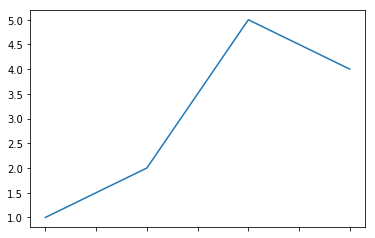

In [24]:
s.plot()

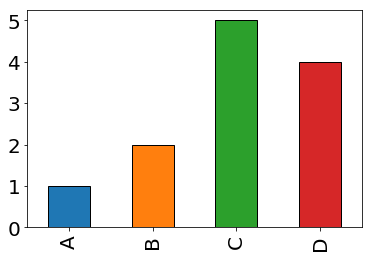

In [44]:
s.plot(kind="bar", fontsize=20, edgecolor='black')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x111d6d048>,
      dtype=object)

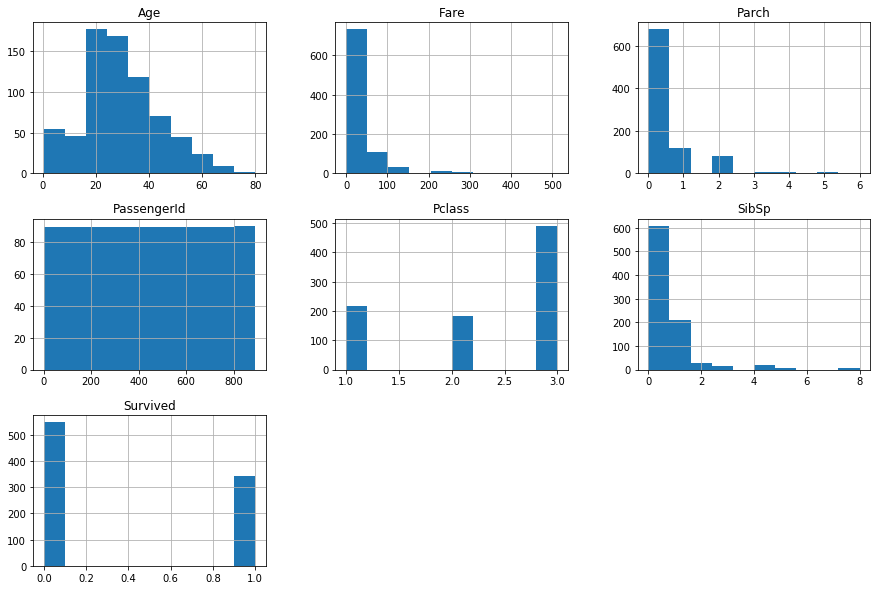

In [15]:
titanic.hist(figsize=[15, 10])

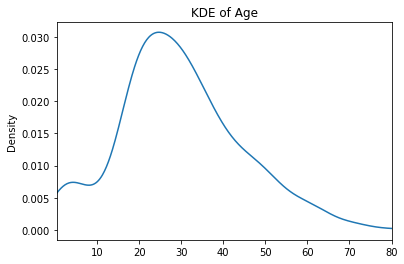

In [20]:
titanic["Age"].plot("kde", xlim=(titanic["Age"].min(), titanic["Age"].max()), title="KDE of Age")

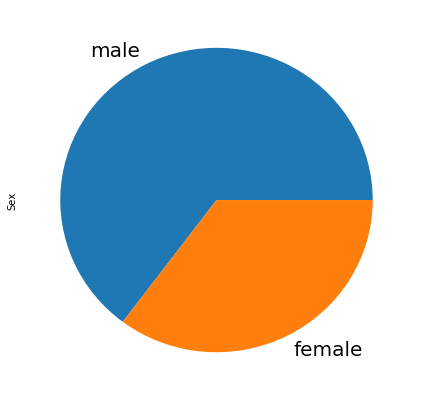

In [28]:
titanic["Sex"].value_counts().plot(kind="pie", figsize=(7, 7), fontsize=20);

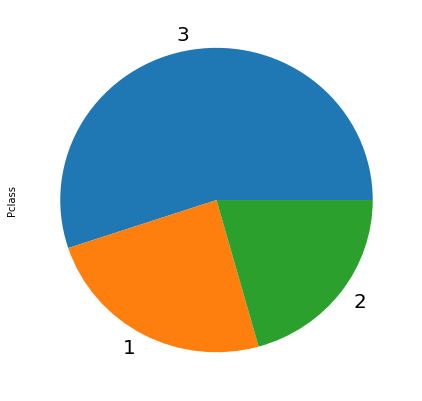

In [29]:
titanic["Pclass"].value_counts().plot(kind="pie", figsize=(7, 7), fontsize=20);

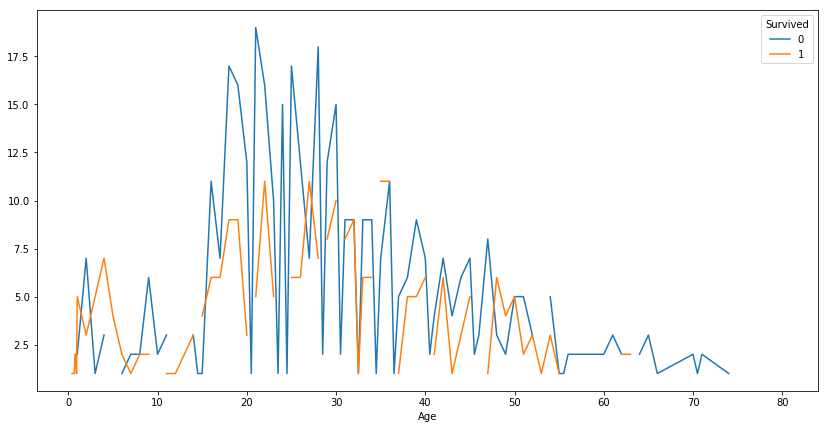

In [43]:
titanic[["Age", "Survived"]].pivot_table(index=["Age"], columns=["Survived"], aggfunc=len).plot(figsize=(14, 7))

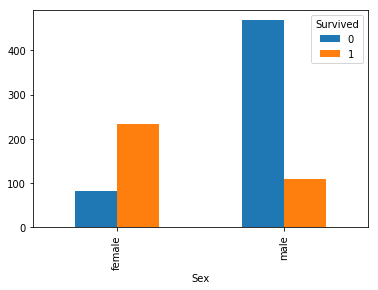

In [33]:
titanic[["Sex", "Survived"]].pivot_table(index="Sex", columns="Survived", aggfunc=len).plot(kind="bar")

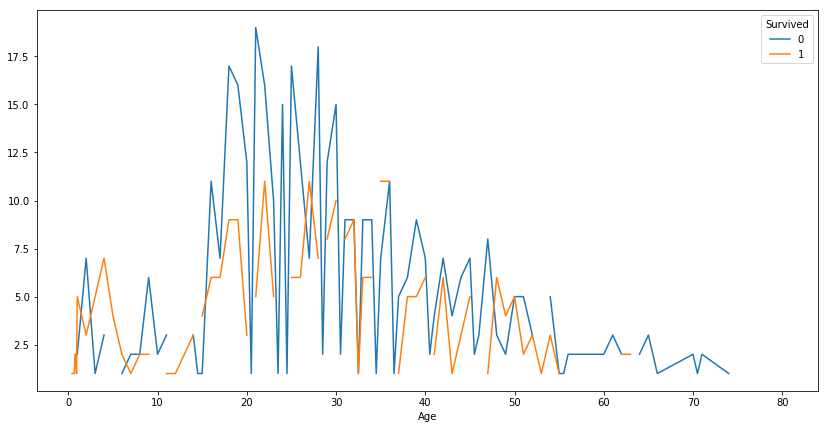

In [36]:
titanic[["Age", "Survived"]].pivot_table(index="Age", columns="Survived", aggfunc=len).plot(figsize=(14, 7))